In [ ]:
%pip install seaborn
%pip install pycaret


# 1. Exploratory Data Analysis

First, we will load the data after importing all the python libraries that we would need.

In [2]:
import pandas as pd

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('Occupancy.csv')

df.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
5,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
6,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
7,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
8,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
9,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


In [3]:
df.shape

(20560, 7)

Our training dataset consists of 7 numerical variables (float64). There are no missing values (8143 non-null) across all the variables. as we have a clean dataset with no missing values.

Next, we look at our features and the data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


Next, we look at the distribution of the dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,20560.0,20.906212,1.055315,19.000000,20.200000,20.700000,21.525000,24.408333
Humidity,20560.0,27.655925,4.982154,16.745000,24.500000,27.290000,31.290000,39.500000
Light,20560.0,130.756622,210.430875,0.000000,0.000000,0.000000,301.000000,1697.250000
CO2,20560.0,690.553276,311.201281,412.750000,460.000000,565.416667,804.666667,2076.500000
HumidityRatio,20560.0,0.004228,0.000768,0.002674,0.003719,0.004292,0.004832,0.006476
Occupancy,20560.0,0.231031,0.421503,0.000000,0.000000,0.000000,0.000000,1.000000


The dataset consists of 6 features and a target variable (Occupancy).

Temperature in the range 19°C and 23.18°C,
Humidity in the range 16.74% – 39.11%,
Light (Lux) in the range 0.0 and 1546.33
CO2 (ppm) in the range 412.75 and 2028.50
Humidity Ratio in the range of 25.56% to 100.16%

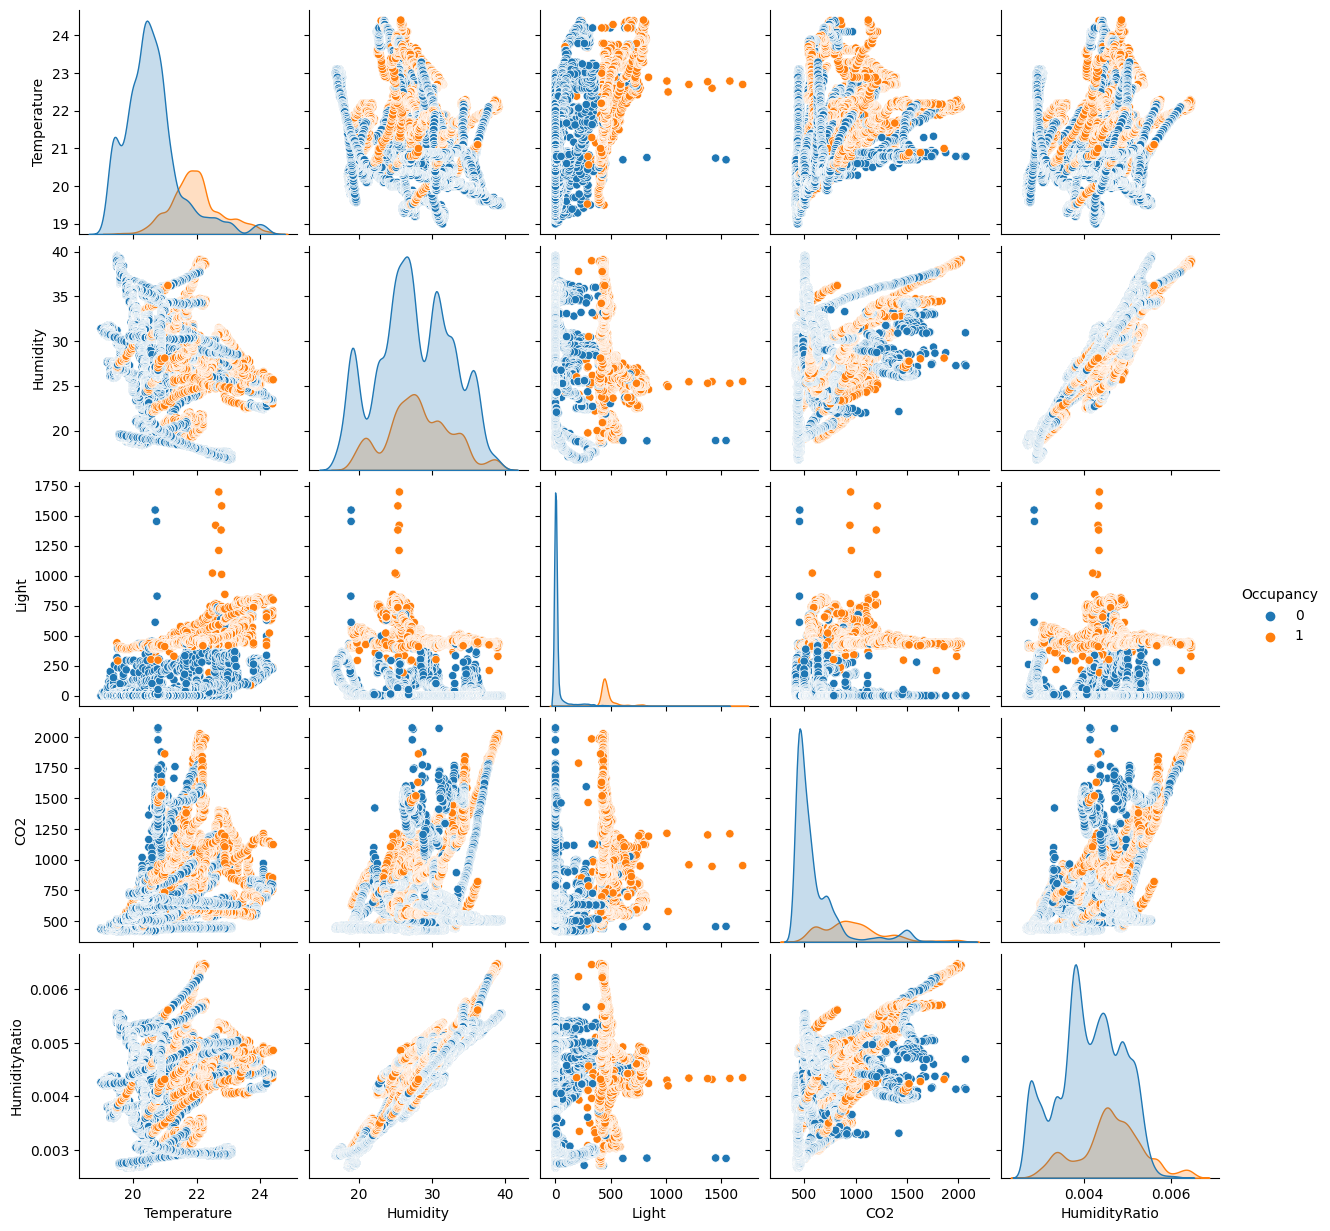

In [6]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde', hue = 'Occupancy')

# 2. Data Preprocessing

In this step, we will check for missing values, duplicates, and drop irrelevant attributes. We will start off by dropping the “date” and “Humidity” variables as we will not be using them for building our ML model. Next, since our dataset has a timestamp, we can see that they are no duplicates. There are also no missing values in our training dataset.

In [7]:
# Check for missing values
print("Missing values: ", df.isnull().sum())

Missing values:  date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [8]:
# Check the data types of the columns
print("Data types: ", df.dtypes)

Data types:  date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object


In [9]:
# Drop any duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Extract the year, month, day, and hour from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [12]:
# Drop the original 'date' column
# df.drop('date', axis=1, inplace=True)

In [13]:
# Check the updated DataFrame
print(df.head())

                 date  Temperature  Humidity       Light         CO2  \
0 2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1 2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2 2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
3 2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
4 2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

   HumidityRatio  Occupancy  year  month  day  hour  
0       0.004764          1  2015      2    2    14  
1       0.004773          1  2015      2    2    14  
2       0.004765          1  2015      2    2    14  
3       0.004744          1  2015      2    2    14  
4       0.004767          1  2015      2    2    14  


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Light'}>,
        <Axes: title={'center': 'CO2'}>],
       [<Axes: title={'center': 'HumidityRatio'}>,
        <Axes: title={'center': 'Occupancy'}>]], dtype=object)

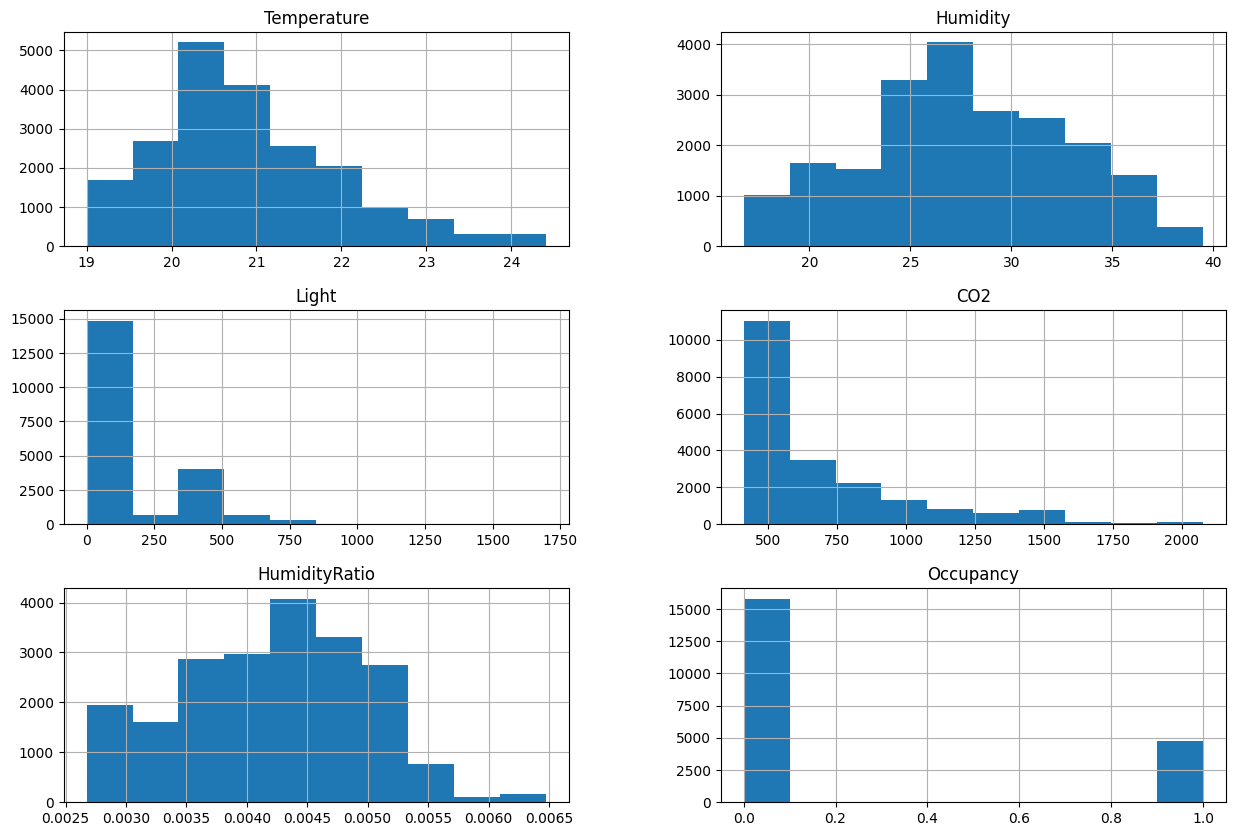

In [14]:
features = ["Temperature", "Humidity","Light","CO2","HumidityRatio","Occupancy"]
df[features].hist(figsize=(15, 10))

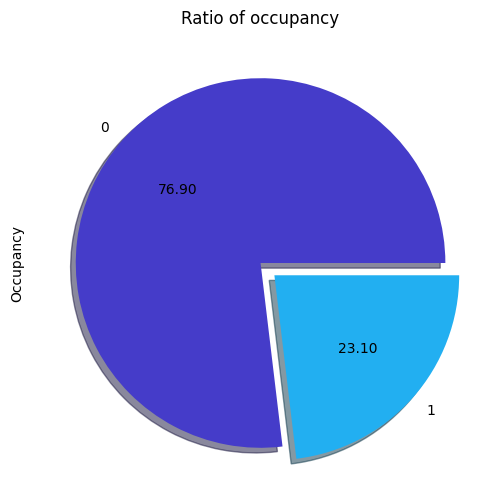

In [15]:
import matplotlib.pyplot as plt
colors=('#453CC9','#22AFF1')
explode=[0,0.1]
df["Occupancy"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of occupancy')
plt.show()

C:\Users\schan\AppData\Local\Temp\ipykernel_36744\3754507791.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


<Axes: title={'center': 'Correlation between variables'}>

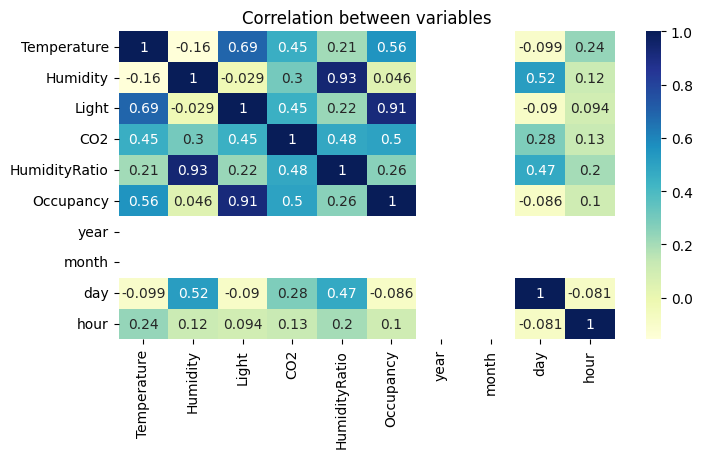

In [16]:
import seaborn as sns
plt.subplots(figsize=(8,4))
plt.title('Correlation between variables')
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# 3. Data Visualizations

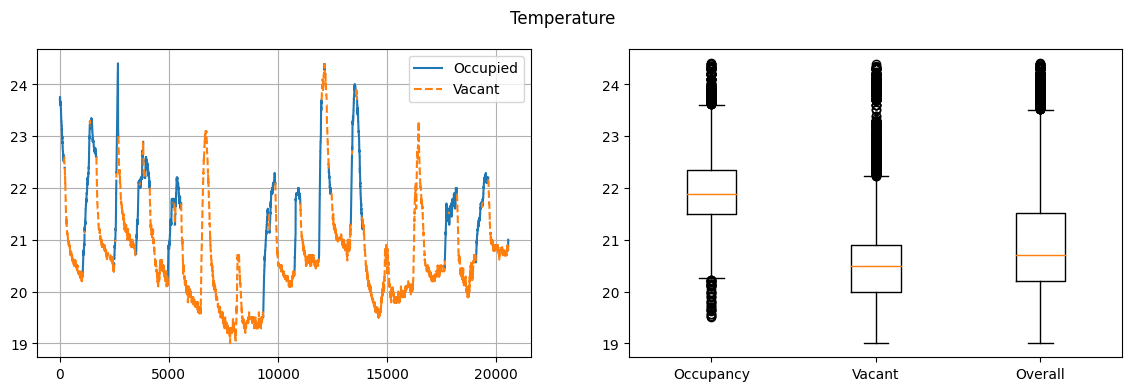

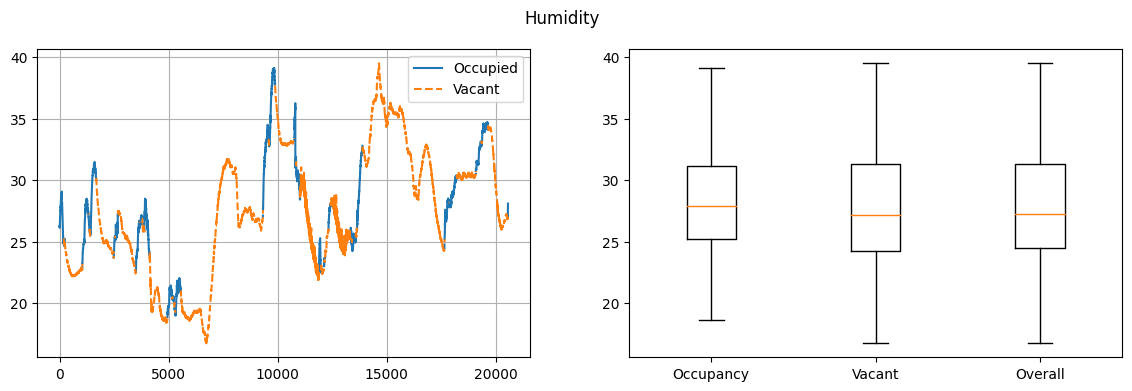

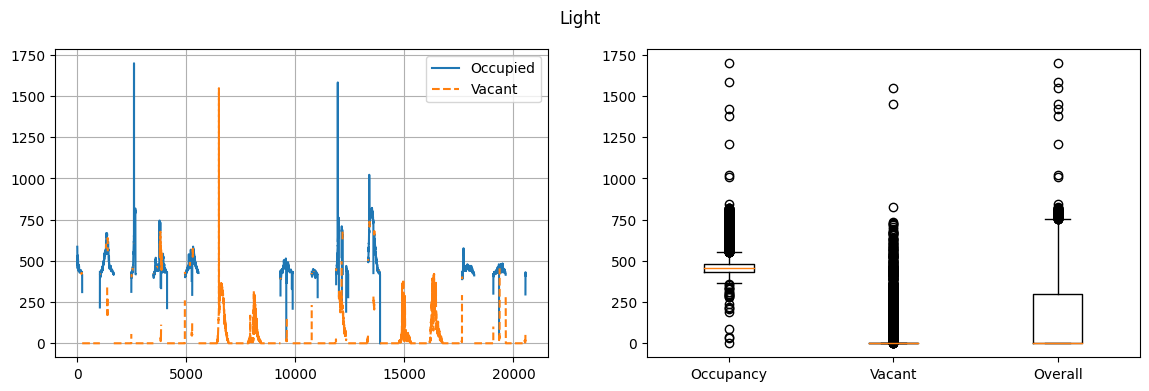

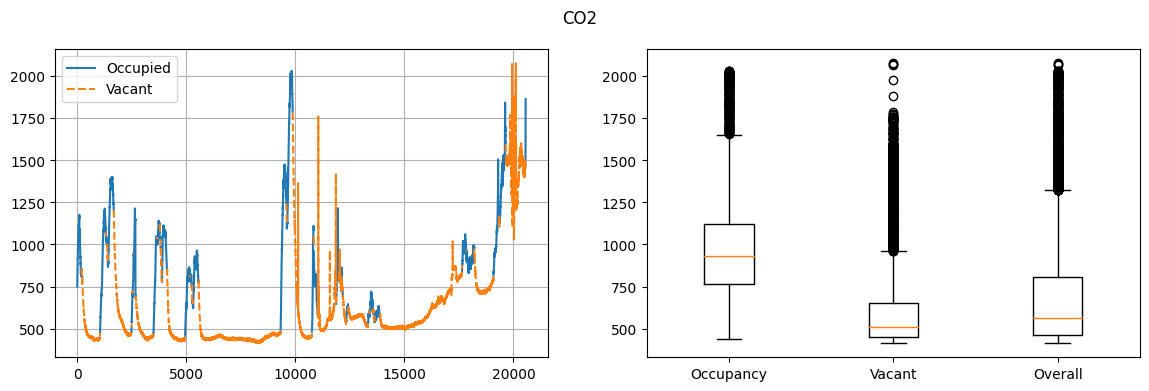

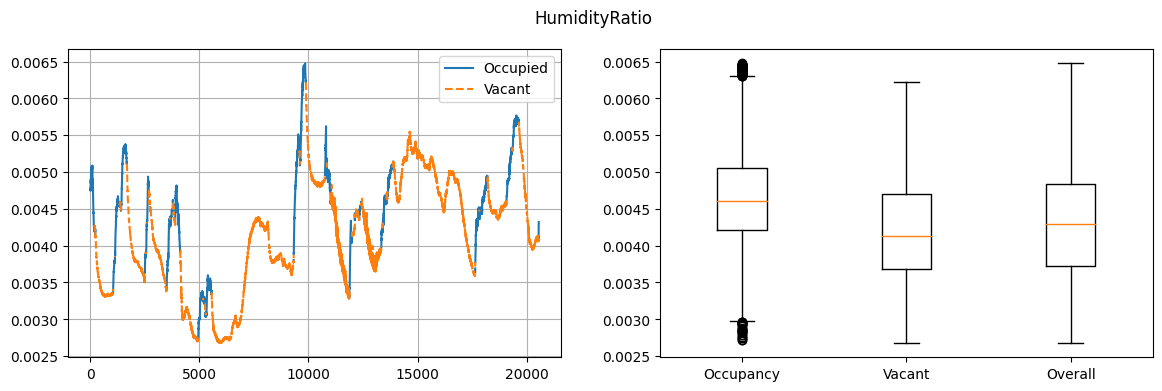

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def occupancy_plot(df, cat):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    
    fig.suptitle(cat)
    ax1.plot(np.where(df.Occupancy==1, df[cat], None), label='Occupied')
    ax1.plot(np.where(df.Occupancy==0, df[cat], None), label='Vacant', ls='--')
    ax1.grid()
    ax1.legend()
    
    ax2.boxplot([df[cat][df.Occupancy==1], df[cat][df.Occupancy==0], df[cat]])
    ax2.set_xticklabels(['Occupancy', 'Vacant', 'Overall'])


for i in range(1, 6):
    occupancy_plot(df, df.columns[i])

In [18]:
df2 = df
df2 = df2[np.abs(df2.Temperature - df2.Temperature.mean()) <= 3*df2.Temperature.std()]
print("1. Removing the Outliers on 'Temperature' has reduced the data size from {} to {}.".format(len(df), len(df2)))
print("\n")
df = df2[np.abs(df2.Light - df2.Light.mean()) <= 3*df2.Light.std()]
print("2. Removing the Outliers on 'Light' has reduced the data size from {} to {}.".format(len(df2), len(df)))
print("\n")
df2 = df[np.abs(df.CO2 - df.CO2.mean()) <= 3*df2.CO2.std()]
print("3. Removing the Outliers on 'CO2' has reduced the data size from {} to {}.".format(len(df), len(df2)))
print("\n")

1. Removing the Outliers on 'Temperature' has reduced the data size from 20560 to 20417.


2. Removing the Outliers on 'Light' has reduced the data size from 20417 to 20261.


3. Removing the Outliers on 'CO2' has reduced the data size from 20261 to 19991.




In [19]:
df2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour
count,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.0,19991.0,19991.000000,19991.000000
mean,20.848690,27.584285,120.591132,673.960672,0.004201,0.216948,2015.0,2.0,10.037767,11.384773
std,0.995753,4.910707,199.095897,284.069642,0.000747,0.412177,0.0,0.0,4.761634,7.140624
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,2015.0,2.0,2.000000,0.000000
25%,20.166667,24.500000,0.000000,458.500000,0.003713,0.000000,2015.0,2.0,6.000000,5.000000
50%,20.700000,27.290000,0.000000,559.250000,0.004273,0.000000,2015.0,2.0,9.000000,11.000000
75%,21.463333,31.200000,225.250000,796.125000,0.004819,0.000000,2015.0,2.0,14.000000,18.000000
max,24.066667,39.500000,756.000000,1625.000000,0.005978,1.000000,2015.0,2.0,18.000000,23.000000


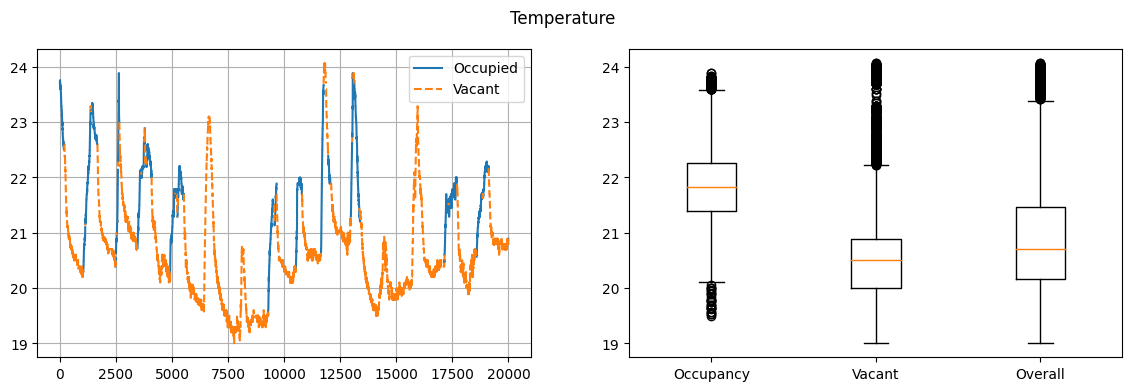

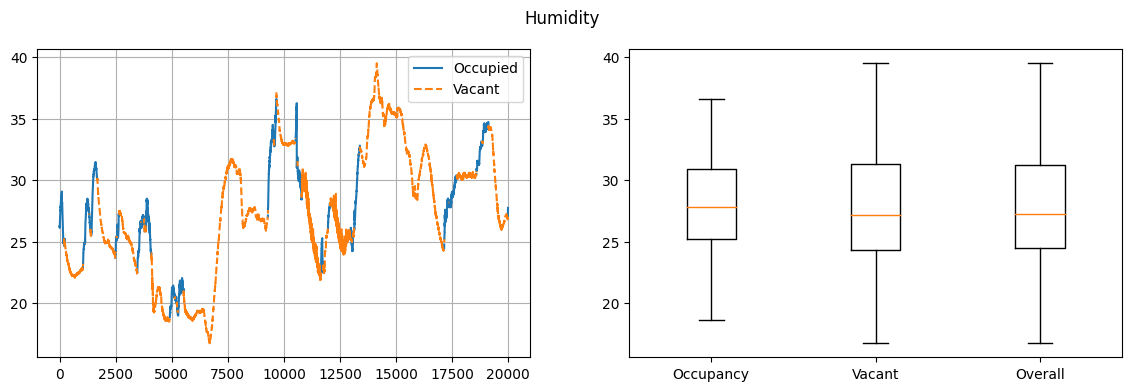

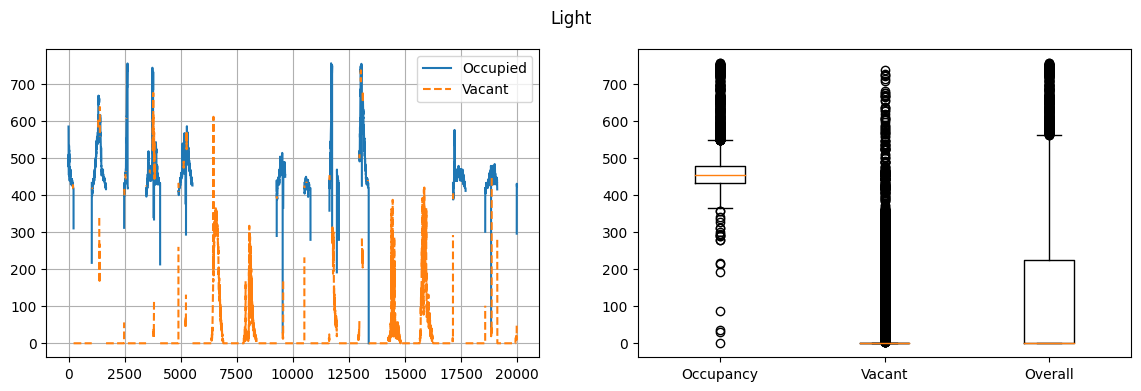

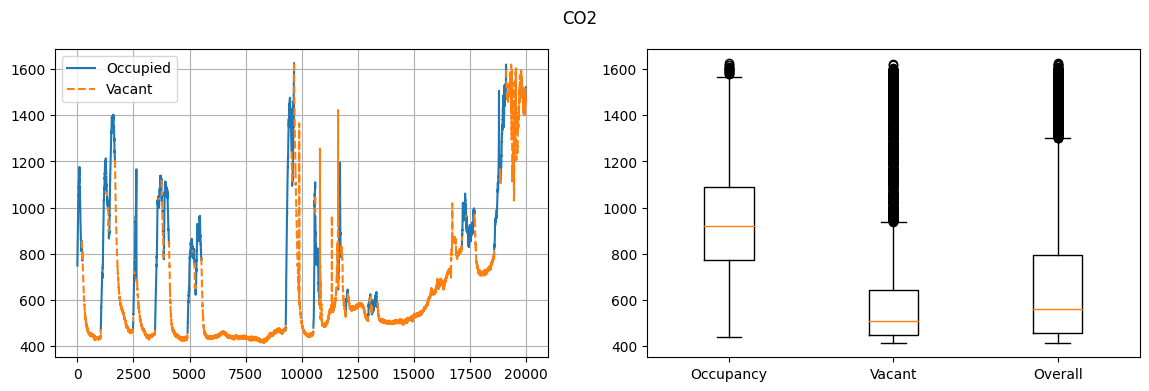

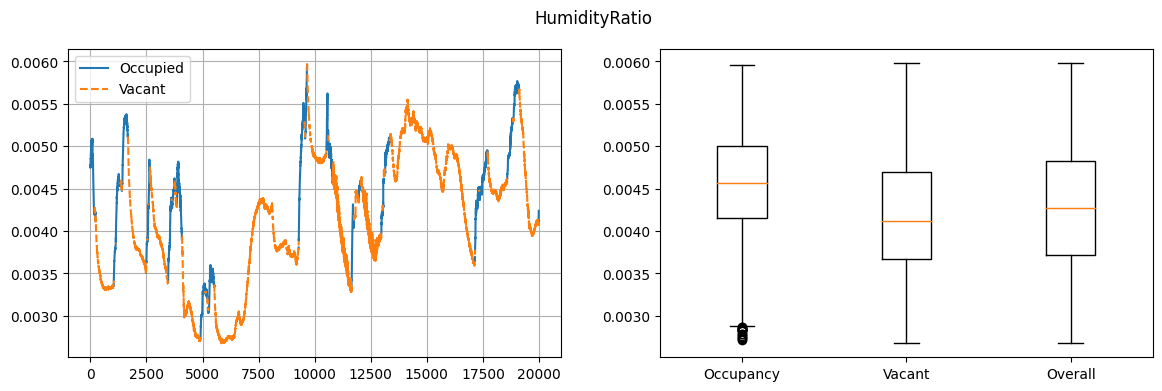

In [22]:
for i in range(1, 6):
    occupancy_plot(df2, df2.columns[i])

Correleation Heatmap: Humidity Ratio and Humidity are strongly, positivedly correlative. Light is a powerful indicator for Occupancy.

C:\Users\schan\AppData\Local\Temp\ipykernel_36744\3175795306.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df2.corr()))
C:\Users\schan\AppData\Local\Temp\ipykernel_36744\3175795306.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True, fmt="1.2f", mask=mask, cmap="YlGnBu")


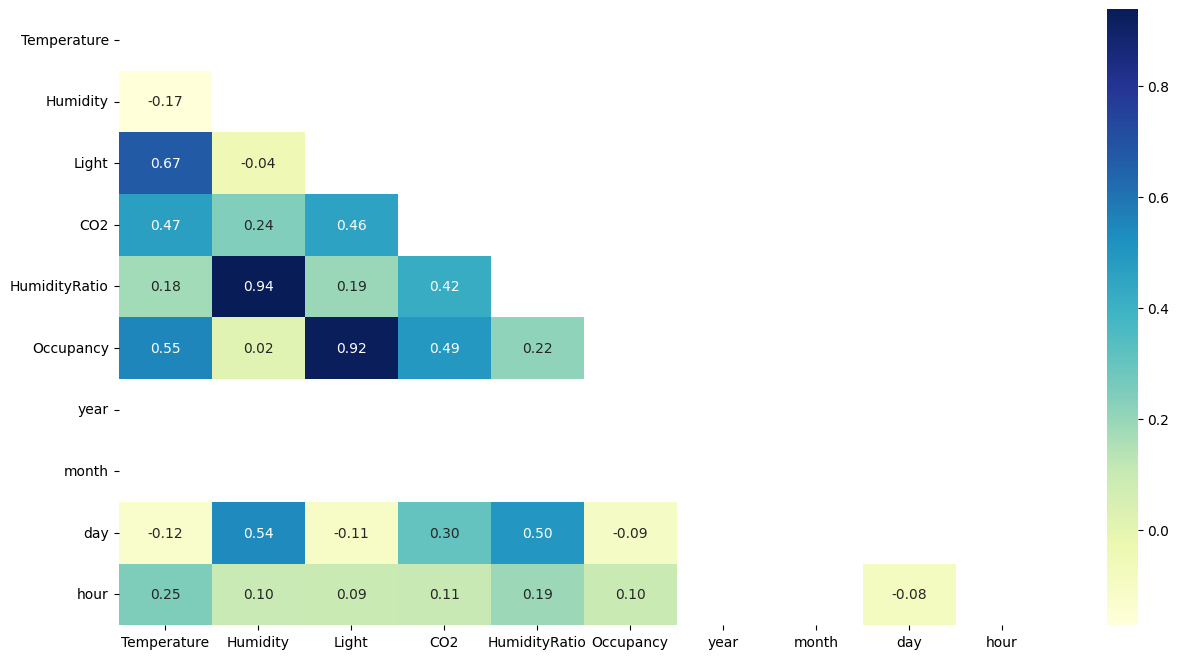

In [23]:
import seaborn as sns

mask = np.triu(np.ones_like(df2.corr()))
plt.figure(figsize = (15,8))
sns.heatmap(df2.corr(),annot=True, fmt="1.2f", mask=mask, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

# 4. Develop the model

To develop our machine learning models we will be using the Python ML wrapper PyCaret. PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.

# Feature Selection
A critical part of the success of a machine learning project is coming up with a good set of features or predictors to train on. Feature selection involves selecting the most useful features to train on amongst existing features.

From our correlation matrix, we can see that the variables CO2 and light are very good predictors for our target variable (Occupancy). Hence we will be building a machine learning model using these variables. We will then compare the performance of this model with when we use other variables such as the Humidity ratio and Temperature.

Model 1: We select CO2 and Light as the input variables.

In [24]:

model_1 = df[['CO2', 'Light',  'Occupancy']]


In [25]:
model_2 = df[['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]


# Model 1

First, we step up the environment in Pycaret and then compare the performance of different ML models

In [26]:
from pycaret.classification import *
experiment = setup(model_1, target='Occupancy', fix_imbalance=True)


,Description,Value
0,Session id,8034
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(20261, 3)"
4,Transformed data shape,"(28071, 3)"
5,Transformed train set shape,"(21992, 3)"
6,Transformed test set shape,"(6079, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [27]:

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9903,0.9966,0.9925,0.9653,0.9787,0.9724,0.9725,0.6330
ada,Ada Boost Classifier,0.9895,0.9970,0.9950,0.9598,0.9771,0.9702,0.9705,0.3680
knn,K Neighbors Classifier,0.9894,0.9948,0.9928,0.9612,0.9767,0.9698,0.9701,0.3760
et,Extra Trees Classifier,0.9894,0.9970,0.9884,0.9652,0.9766,0.9697,0.9699,0.5560
lightgbm,Light Gradient Boosting Machine,0.9889,0.9979,0.9915,0.9606,0.9758,0.9686,0.9688,0.2890
gbc,Gradient Boosting Classifier,0.9883,0.9964,0.9893,0.9599,0.9744,0.9668,0.9670,0.7170
dt,Decision Tree Classifier,0.9865,0.9823,0.9749,0.9653,0.9700,0.9613,0.9614,0.2000
lr,Logistic Regression,0.9862,0.9946,0.9965,0.9451,0.9701,0.9611,0.9617,0.7470
qda,Quadratic Discriminant Analysis,0.9754,0.9944,0.9981,0.9030,0.9481,0.9320,0.9341,0.2160
nb,Naive Bayes,0.9750,0.9944,0.9984,0.9013,0.9473,0.9309,0.9331,0.1990


From our list of models, we can see that the Random Forest Classifier performs best with our training dataset. We obtained an accuracy of 99.04%, F1 score of 0.9777, a recall of 0.9950, and a precision of 0.9613. Our results are very satisfying

Next, we create the model

In [28]:
rf_classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9873,0.9942,0.9937,0.9520,0.9724,0.9642,0.9645
1,0.9979,0.9999,0.9969,0.9938,0.9953,0.9939,0.9939
2,0.9915,0.9953,0.9906,0.9723,0.9814,0.9759,0.9760
3,0.9887,0.9967,0.9906,0.9605,0.9753,0.9680,0.9682
4,0.9922,0.9982,1.0000,0.9667,0.9831,0.9780,0.9783
5,0.9887,0.9979,0.9906,0.9605,0.9753,0.9680,0.9682
6,0.9901,0.9964,0.9843,0.9720,0.9781,0.9718,0.9718
7,0.9901,0.9968,0.9969,0.9606,0.9784,0.9720,0.9723
8,0.9880,0.9948,0.9874,0.9602,0.9736,0.9659,0.9660


# 5. Predicting Occupancy Using LSTM based RNN model


Epoch 1/50
450/450 [==============================] - 4s 4ms/step - loss: 0.4385 - accuracy: 0.8307 - val_loss: 0.2035 - val_accuracy: 0.9481
Epoch 2/50
450/450 [==============================] - 1s 3ms/step - loss: 0.1367 - accuracy: 0.9653 - val_loss: 0.0954 - val_accuracy: 0.9778
Epoch 3/50
450/450 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9832 - val_loss: 0.0668 - val_accuracy: 0.9893
Epoch 4/50
450/450 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9878 - val_loss: 0.0577 - val_accuracy: 0.9903
Epoch 5/50
450/450 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9885 - val_loss: 0.0535 - val_accuracy: 0.9906
Epoch 6/50
450/450 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9885 - val_loss: 0.0516 - val_accuracy: 0.9906
Epoch 7/50
450/450 [==============================] - 2s 3ms/step - loss: 0.0526 - accuracy: 0.9885 - val_loss: 0.0507 - val_accuracy: 0.9906
Epoch 

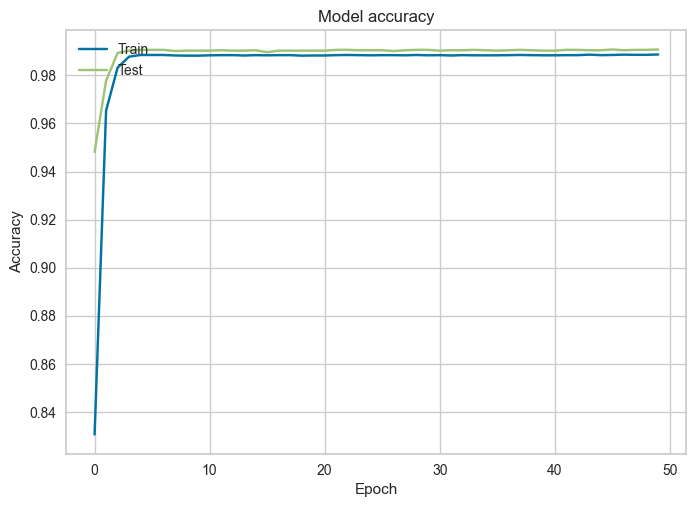

193/193 [==============================] - 1s 1ms/step
Accuracy of LSTM based RNN model: 99.08%


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load occupancy dataset
df = pd.read_csv("Occupancy.csv")

# select features and target variable
X = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
Y = df[['Occupancy']]

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# predict occupancy
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

# calculate accuracy
accuracy = ((Y_pred == Y_test).mean() * 100).iloc[0]
print('Accuracy of LSTM based RNN model: {:.2f}%'.format(accuracy))


# Machine Learning method for Time Series management

Split the data into training and testing sets and apply the resulting model on the testing set.

In [32]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df2.drop(columns= ['Occupancy','date'], axis=1)
y = df2['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

# Building a Logistic Regression Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicting the test set results
y_pred_lr = lr.predict(X_test)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[4630   61]
 [   6 1301]]

Accuracy Score: 0.9888296098699566

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4691
           1       0.96      1.00      0.97      1307

    accuracy                           0.99      5998
   macro avg       0.98      0.99      0.98      5998
weighted avg       0.99      0.99      0.99      5998



# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier


# Building a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predicting the test set results
y_pred_dt = dt.predict(X_test)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[4657   34]
 [  29 1278]]

Accuracy Score: 0.9894964988329443

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4691
           1       0.97      0.98      0.98      1307

    accuracy                           0.99      5998
   macro avg       0.98      0.99      0.98      5998
weighted avg       0.99      0.99      0.99      5998



# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Building a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the test set results
y_pred_rf = rf.predict(X_test)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[4666   25]
 [  16 1291]]

Accuracy Score: 0.9931643881293765

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4691
           1       0.98      0.99      0.98      1307

    accuracy                           0.99      5998
   macro avg       0.99      0.99      0.99      5998
weighted avg       0.99      0.99      0.99      5998



In [39]:
# Get the predicted values for the testing set
# Convert X_test back to a DataFrame
X_test = pd.DataFrame(X_test, columns=df2.columns[:-2])


y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# # Create a new DataFrame with the predicted values and the index from the testing set
# results_df = pd.DataFrame({'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf, 'Logistic Regression': y_pred_lr}, index=X_test.index)

# Create a new DataFrame with the predicted values and the index from the testing set
results_df = pd.DataFrame(data=np.column_stack((y_pred_dt, y_pred_rf, y_pred_lr)),
                          index=X_test.index,
                          columns=['Decision Tree', 'Random Forest', 'Logistic Regression'])


# Merge the new DataFrame with the original DataFrame
merged_df = pd.concat([df2, results_df], axis=1)


# Write the merged DataFrame to a CSV file
merged_df.to_csv('C:\\Users\\schan\\OneDrive\\Documents\\SLU Works\\AAI-530 Data Analytics and Internet of Things\\predicted_occupancy.csv', index=False)

